# **Project: House Prices - Linear Regression Techniques**

### **Reference**: [Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)

--- 
### **1. Look the big picture**

- **Objective**: Predict house prices by building a robust linear regression model.
- **Goal**: Minimize the Root-Mean-Squared-Error (RMSE) to improve prediction accuracy.
- **Dataset**: 
  - The dataset contains various features about houses (e.g., square footage, number of rooms, etc.) and their sale prices.
  - Provided by the Kaggle competition: *"House Prices - Advanced Regression Techniques."*
- **Evaluation Metric**: Root-Mean-Squared-Error (RMSE).
  

---
### **2. Get the data**

In [48]:
import pandas as pd
df = pd.read_csv("../data/house_prices/train.csv")
df_test = pd.read_csv("../data/house_prices/test.csv")

In [49]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [50]:
df.shape

(1460, 81)

---
### **3. Explore and visualize the data to gain insights.**

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

#### Find null values

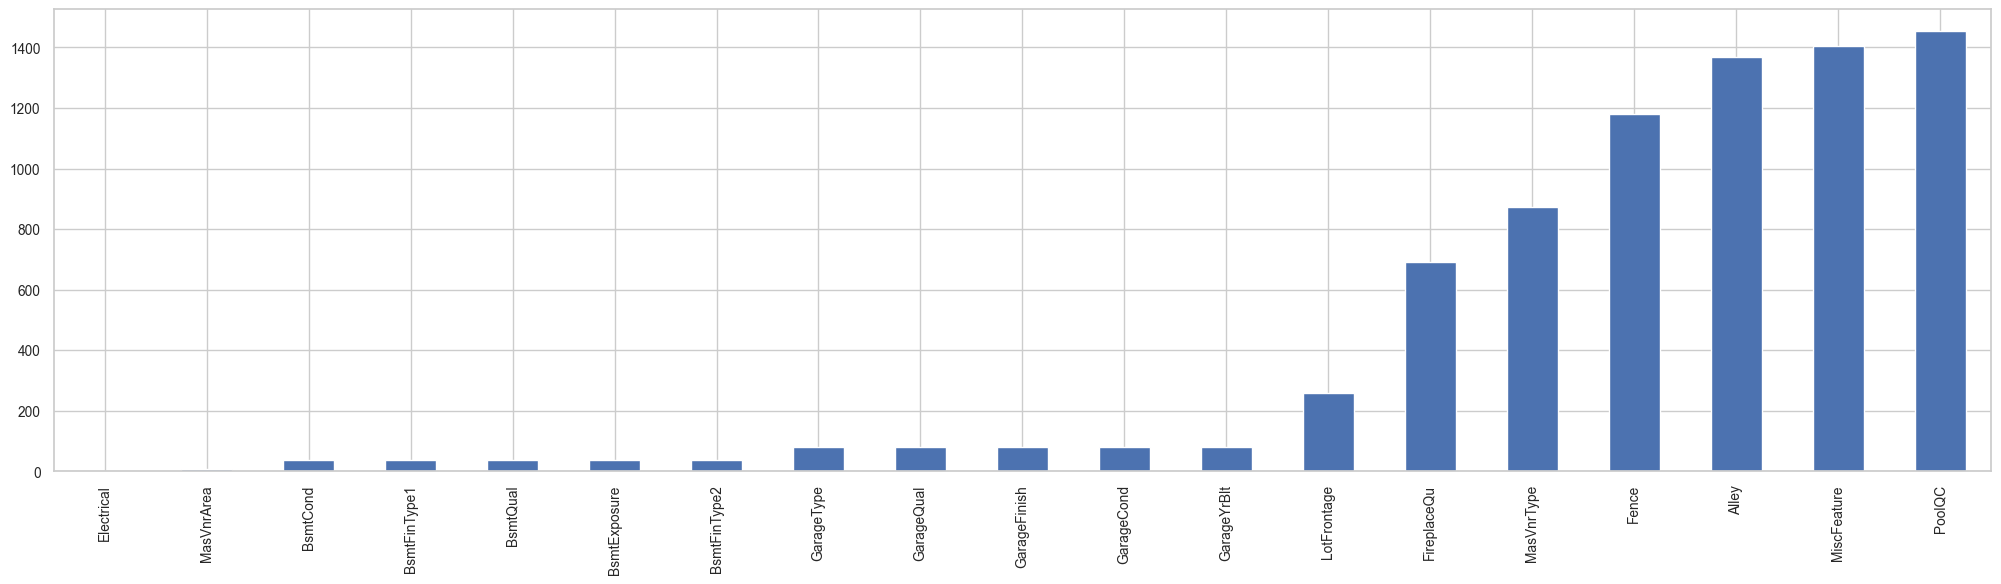

In [52]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot(kind='bar', figsize=(25, 6));


#### Fix null values in "object" types

In [53]:
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna("MISSING")

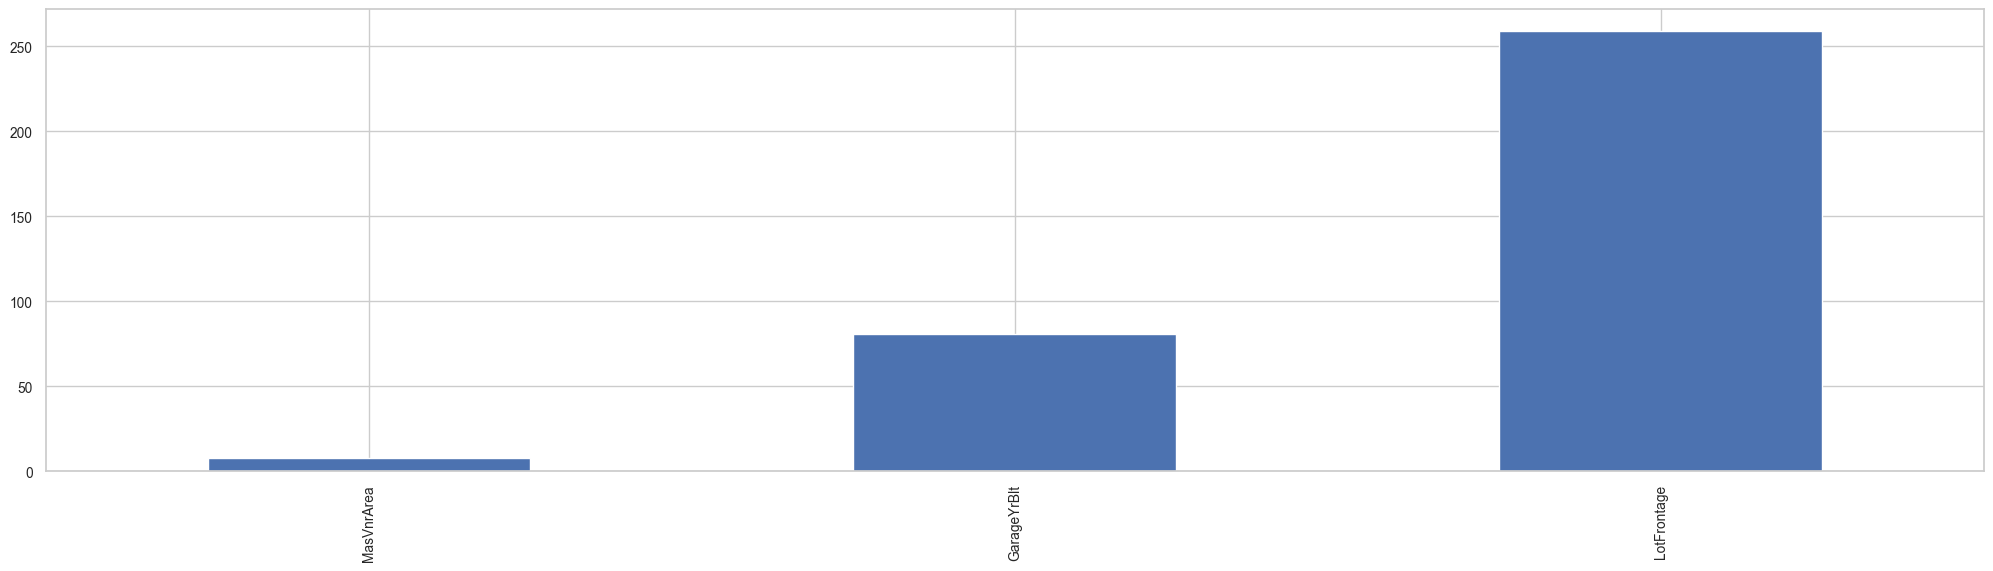

In [54]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot(kind='bar', figsize=(25, 6));

#### General info

In [55]:
# Quantitative features
quantitative = df.select_dtypes(exclude='object').columns.tolist()
quantitative = quantitative[1:] # exclude Id
quantitative = quantitative[:-1] # exclude SalePrice

# Qualitative features  
qualitative = df.select_dtypes(include='object').columns.tolist()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [57]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


#### Understanding the columns
Histograms for numerical data and bar plot for categorical data

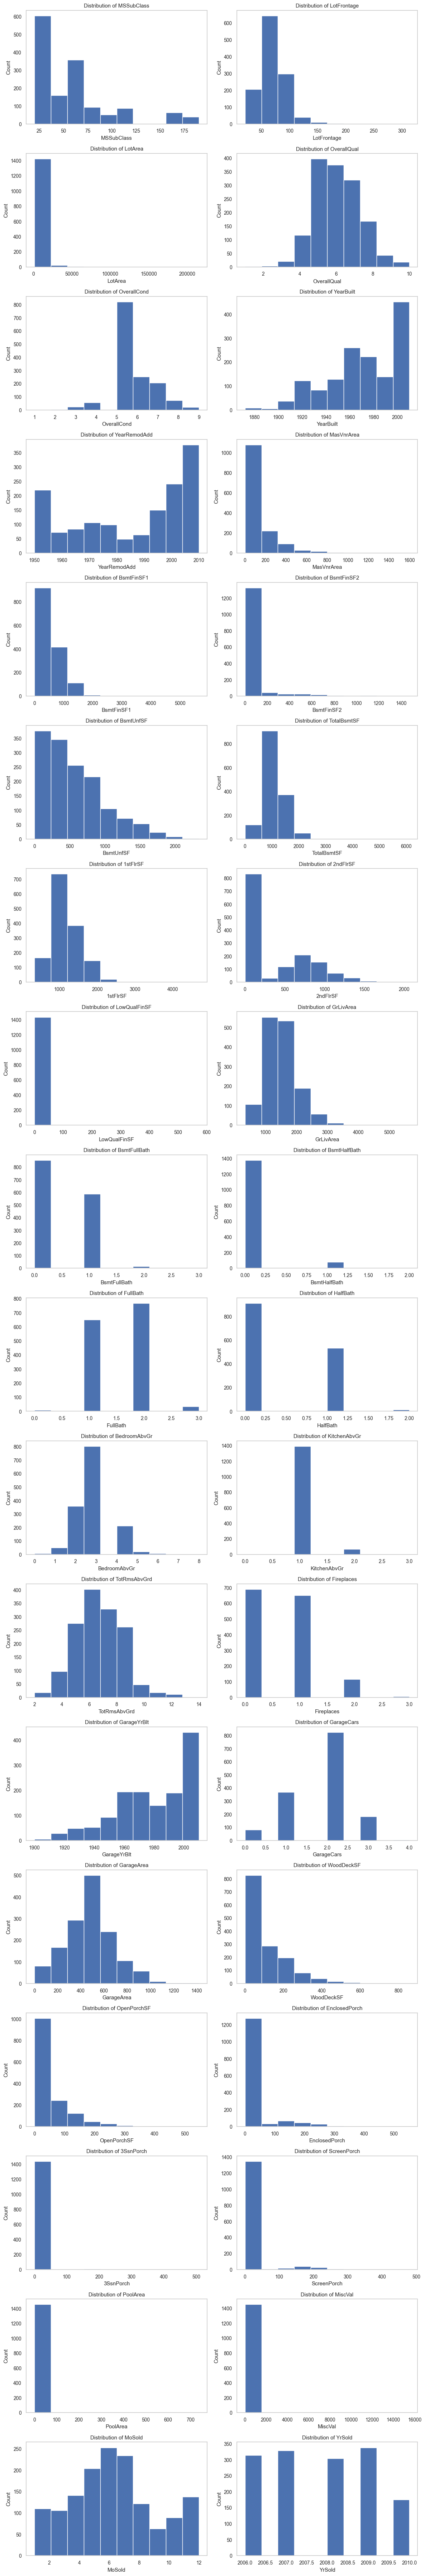

In [58]:
# Define columns to plot (excluding first column)
columns_to_plot = quantitative

# Calculate grid dimensions
n_cols = 2  # Number of columns in the grid
n = len(columns_to_plot)
n_rows = (n + 1) // n_cols  # Number of rows needed

# Create subplots grid with adjusted figure size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()  # Convert to 1D array for easier handling

# Create plots in grid
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    if df[col].dtype == 'object':
        # Create bar plot for categorical data
        df[col].value_counts().sort_values(ascending=False).plot(kind='bar', ax=ax)
        ax.set_title(f"Value Counts for {col}")
        ax.set_xlabel('')  # Remove x-axis label
        ax.set_ylabel('')  # Remove y-axis label
    else:
        # Create histogram for numerical data
        df[col].hist(grid=False, ax=ax)
        ax.set_title(f"Distribution of {col}")
        ax.set_xlabel(col)
        ax.set_ylabel("Count")

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()

#### Relationship Between Categorical Columns and SalePrice (y)

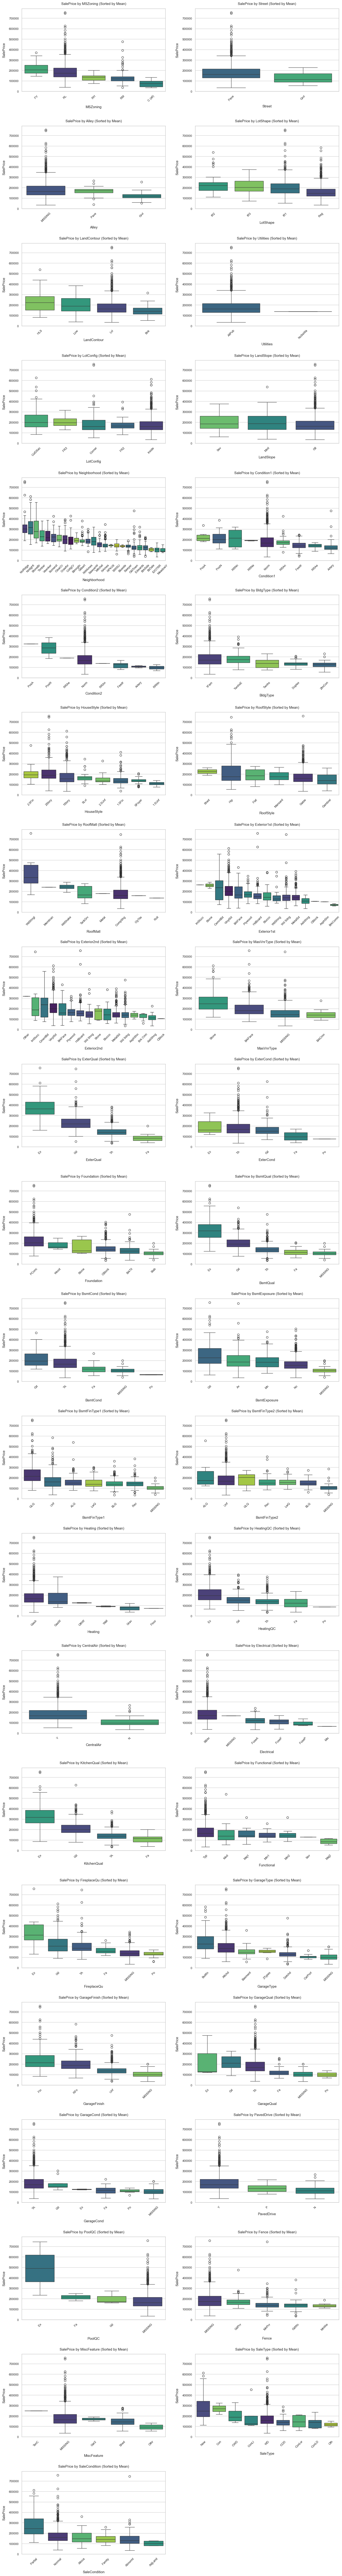

In [59]:
# Define columns to plot (excluding first column)
columns_to_plot = qualitative

# Calculate grid dimensions
n_cols = 2  # Number of columns
n = len(columns_to_plot)
n_rows = (n + 1) // n_cols  # Number of rows needed

# Create subplots grid with adjusted figure size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Convert to 1D array for easier handling

# Create plots in grid
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    # Calculate means and sort
    means = df.groupby(col)['SalePrice'].mean().sort_values(ascending=False)
    
    # Create boxplot with sorted categories - FIXED WARNING HERE
    sns.boxplot(
        x=col, 
        y='SalePrice', 
        data=df, 
        order=means.index, 
        hue=col,               # Added to resolve warning
        legend=False,          # Added to resolve warning
        palette='viridis',
        ax=ax
    )
    
    ax.set_title(f"SalePrice by {col} (Sorted by Mean)", pad=12)
    ax.set_xlabel(col, labelpad=10)
    ax.set_ylabel("SalePrice", labelpad=10)
    ax.tick_params(axis='x', rotation=45)
    
    # Improve readability of x-axis labels
    ax.xaxis.set_tick_params(labelsize=9)
    ax.yaxis.set_tick_params(labelsize=9)

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout and display
plt.tight_layout(pad=2.0)
plt.show()

#### ANOVA Test

ANOVA (Analysis of Variance) is used to evaluate how strongly each categorical feature (e.g., "Neighborhood", "HouseStyle") influences the target variable, SalePrice.

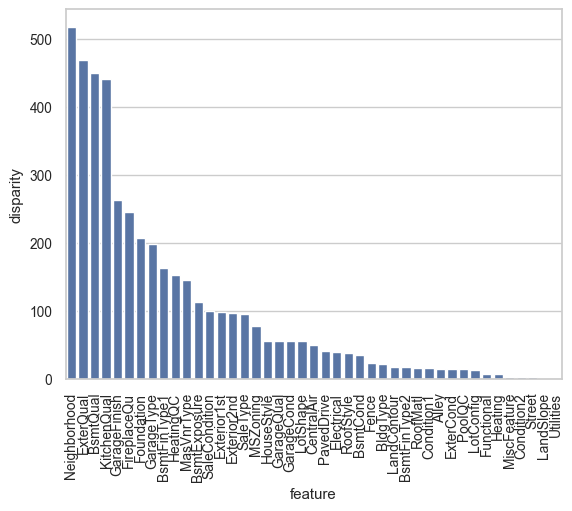

In [60]:


# Create a DataFrame to store the results of the ANOVA test
anv = pd.DataFrame()

# Initialize the DataFrame with a column named 'feature' to store categorical features
anv['feature'] = qualitative

# Initialize an empty list to store the p-values for each feature
pvals = []

# Loop through each categorical feature
for c in qualitative:
    samples = []  # Initialize a list to store the groups of 'SalePrice' for each unique category
    # Loop through each unique category in the current categorical feature
    for cls in df[c].unique():
        # Filter rows where the feature value equals the current category (cls)
        # Extract 'SalePrice' values for this category
        s = df[df[c] == cls]['SalePrice'].values
        samples.append(s)  # Add these values as a group to the samples list
    
    # Perform a one-way ANOVA test on the groups of 'SalePrice' (samples)
    # stats.f_oneway returns the F-statistic and p-value; [1] extracts the p-value
    pval = stats.f_oneway(*samples)[1]
    pvals.append(pval)  # Append the p-value to the list

# Add the calculated p-values to the results DataFrame
anv['pval'] = pvals

# Sort the DataFrame by p-values in ascending order
anv.sort_values('pval', inplace=True)

# Calculate the disparity for visualization: log(1/pval) magnifies significance
anv['disparity'] = np.log(1./anv['pval'].values)

# Create a bar plot using seaborn to visualize feature disparity
sns.barplot(data=anv, x='feature', y='disparity')

# Rotate the x-axis labels by 90 degrees for better readability
x = plt.xticks(rotation=90)


#### Correlations

##### Encode
It’s useful to encode categorical features into numerical representations. The function encode is designed to create an ordinal encoding for a given categorical feature based on the mean Sale Price (SalePrice) of each category. This ensures the encoding reflects the relationship between the feature and the target variable.

In [61]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0] + 1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature + '_E'] = o
    
qual_encoded = []
for q in qualitative:  
    encode(df, q)
    qual_encoded.append(q + '_E')

print(qual_encoded)

['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E']


In [62]:
df[['Neighborhood', 'Neighborhood_E']].head()

,Neighborhood,Neighborhood_E
0,CollgCr,17.0
1,Veenker,21.0
2,CollgCr,17.0
3,Crawfor,18.0
4,NoRidge,25.0


The next code computes the Spearman correlation between each feature and SalePrice and visualizes the results using a horizontal bar plot.

##### Why Spearman Correlation?
Spearman correlation is used in this analysis because:

* Handles Monotonic Relationships: Unlike Pearson correlation, which measures linear relationships, Spearman correlation captures monotonic relationships. This makes it more robust for features that might have a non-linear but consistent ranking association with SalePrice.
* Works with Ordinal Data: Some features, especially the encoded categorical variables (qual_encoded), are ordinal in nature. Spearman correlation is well-suited for such data since it is based on rank-order rather than raw values.
* Less Sensitive to Outliers: By relying on ranks, Spearman correlation is less affected by extreme values or outliers, which are common in real-world datasets like house prices.

<Axes: xlabel='spearman', ylabel='feature'>

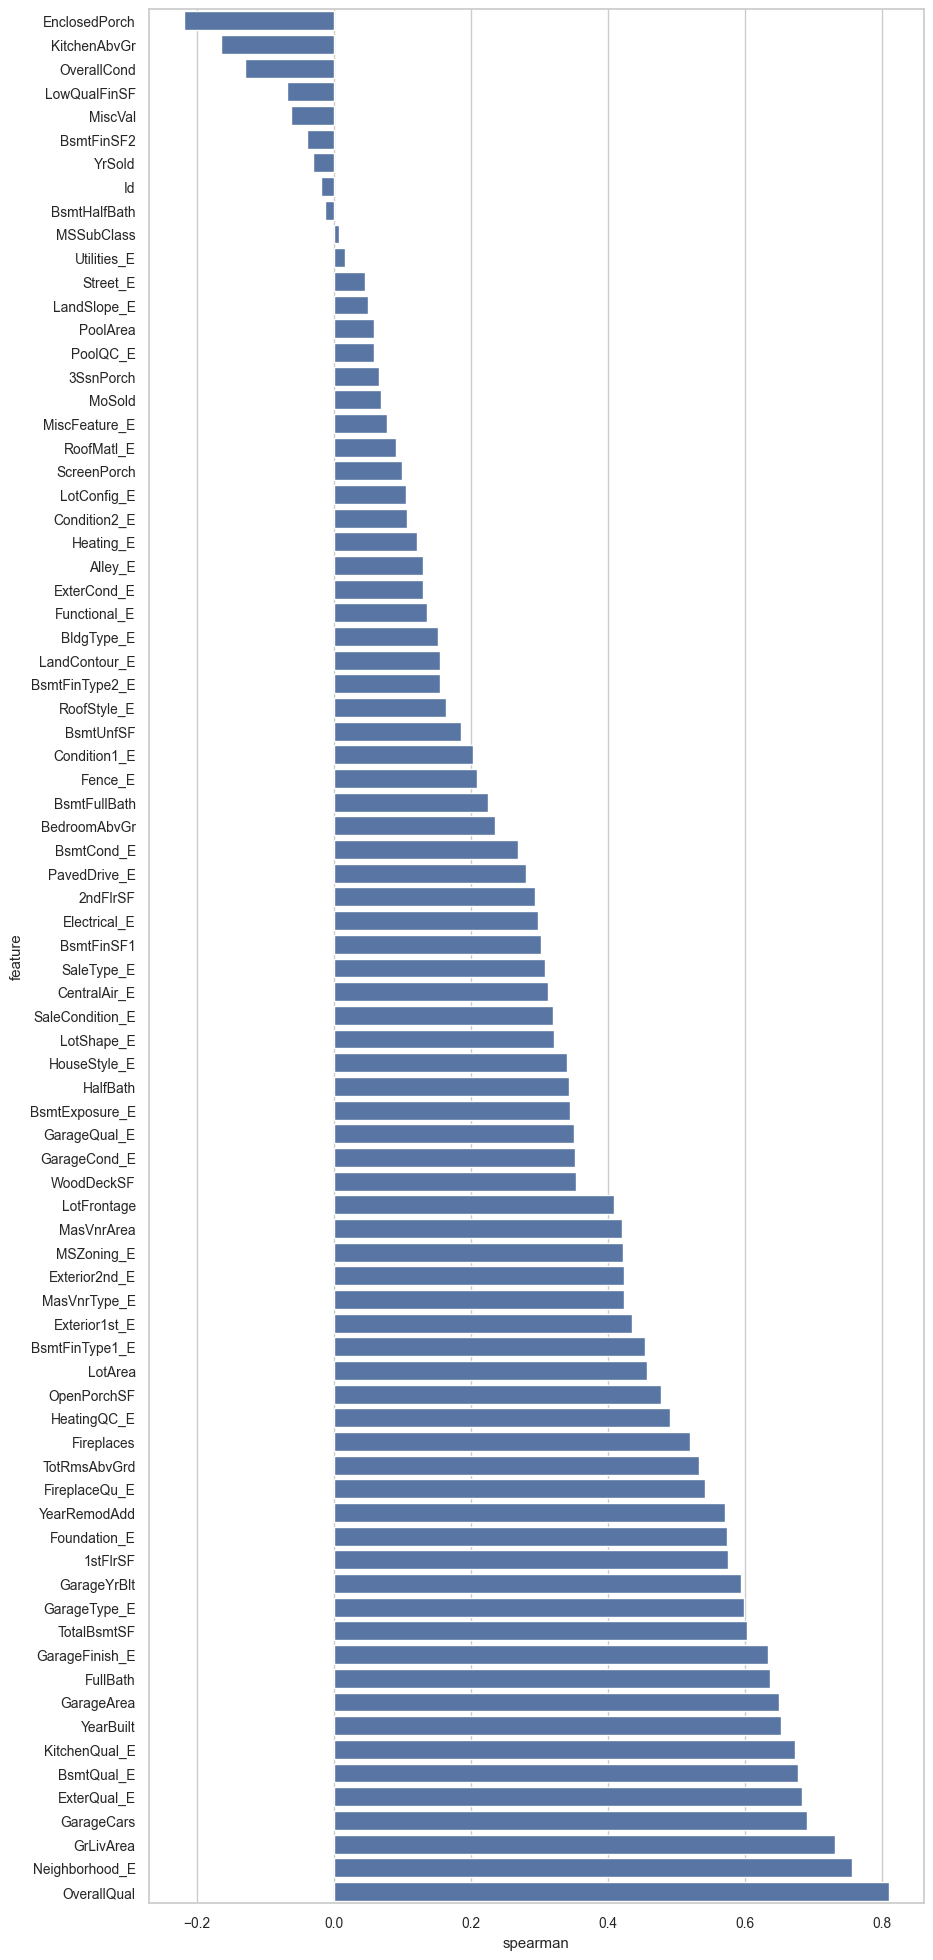

In [63]:
spr = pd.DataFrame()
features = df.select_dtypes(exclude='object').columns.tolist() + qual_encoded
features = [feature for feature in features if feature != 'SalePrice']
spr['feature'] = features
spr['spearman'] = [df[f].corr(df['SalePrice'], 'spearman') for f in features]
spr = spr.sort_values('spearman')
plt.figure(figsize=(10, 0.20*len(features)))
sns.barplot(data=spr, y='feature', x='spearman', orient='h')

c:\Users\david\Documents\Courses\MachineLearningPortfolio\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\david\Documents\Courses\MachineLearningPortfolio\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


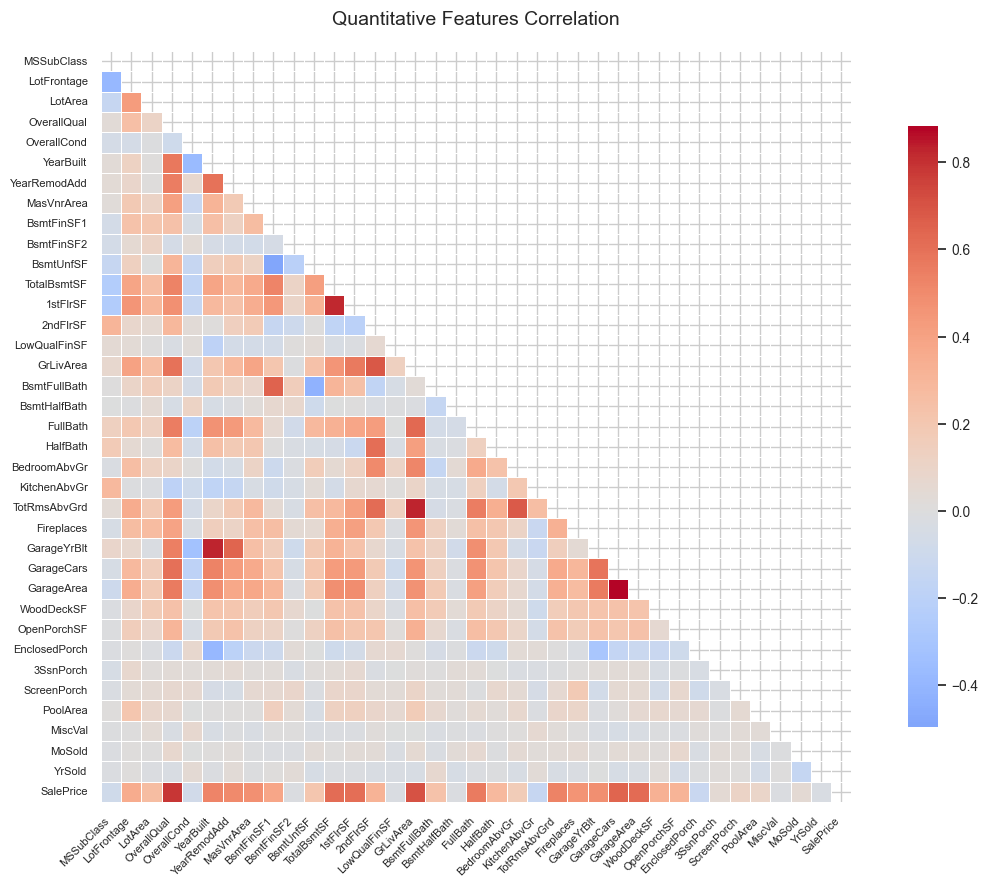

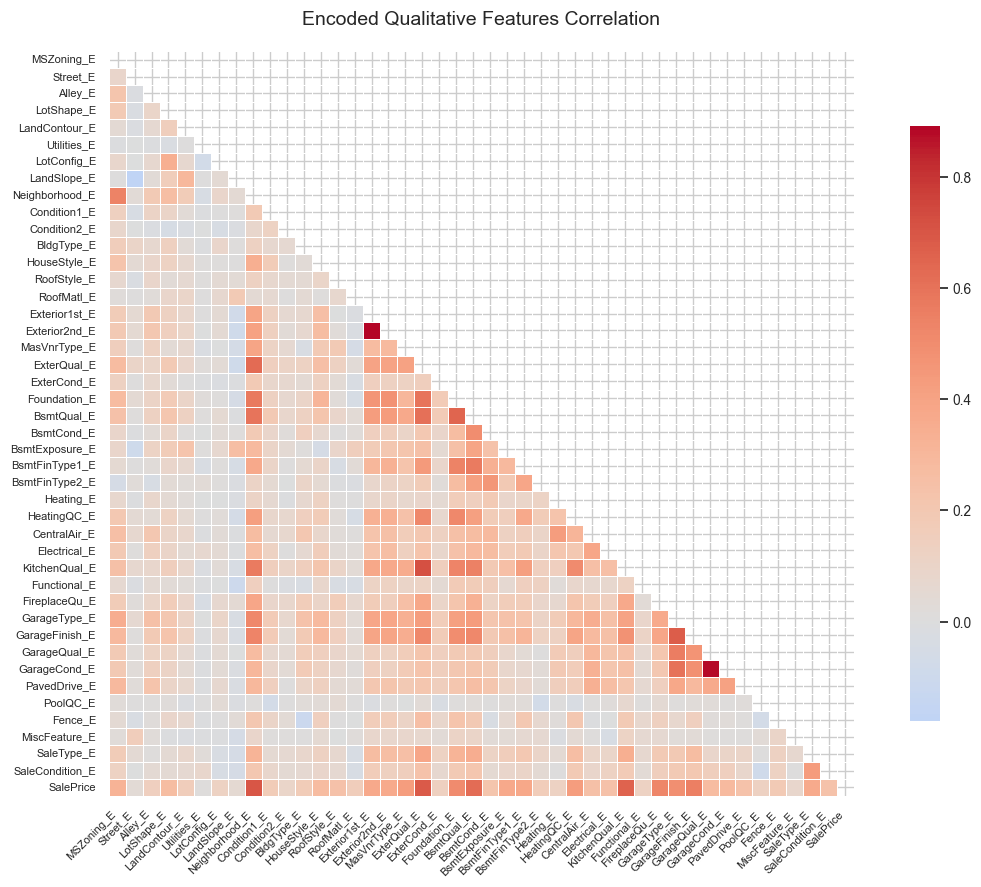

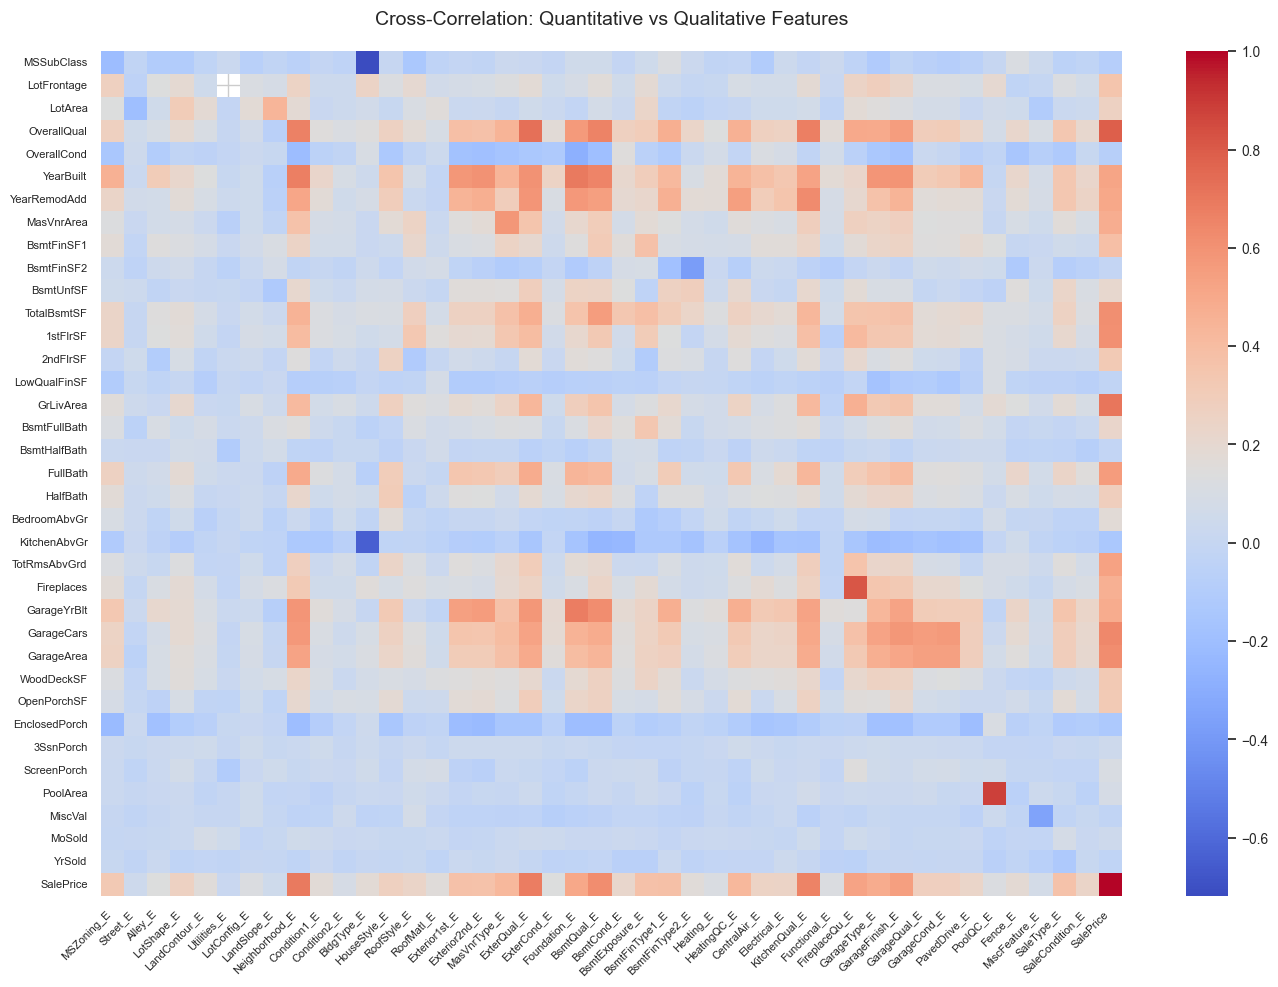

In [64]:
# Set style for better aesthetics
sns.set_theme(context="notebook", style="whitegrid", font_scale=0.9)

# Define helper function to plot heatmaps
def plot_corr_heatmap(data, columns, title, figsize=(12, 9)):
    plt.figure(figsize=figsize)
    corr = data[columns].corr()
    mask = None
    # Optional: Mask upper triangle for square matrices
    if len(columns) == len(corr.columns):
        mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(
        corr,
        cmap='coolwarm',
        annot=False,  # Set to True if you want values
        fmt=".2f",
        center=0,
        square=True,
        mask=mask,
        cbar_kws={'shrink': 0.8},
        linewidths=0.5
    )
    plt.title(title, fontsize=14, pad=20)
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.yticks(rotation=0, fontsize=8)
    plt.tight_layout()

# Plot quantitative features + SalePrice
plot_corr_heatmap(
    df,
    quantitative + ['SalePrice'],
    "Quantitative Features Correlation"
)

# Plot encoded qualitative features + SalePrice
plot_corr_heatmap(
    df,
    qual_encoded + ['SalePrice'],
    "Encoded Qualitative Features Correlation"
)

# Cross-correlation between quantitative and qualitative features
plt.figure(figsize=(14, 10))
corr = pd.DataFrame(np.zeros([len(quantitative)+1, len(qual_encoded)+1]), index=quantitative+['SalePrice'], columns=qual_encoded+['SalePrice'])
for q1 in quantitative+['SalePrice']:
    for q2 in qual_encoded+['SalePrice']:
        corr.loc[q1, q2] = df[q1].corr(df[q2])
sns.heatmap( 
    corr,
    cmap='coolwarm',
)
plt.title("Cross-Correlation: Quantitative vs Qualitative Features", fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()

plt.show()

In [65]:
# TODO Variance Inflation Factor (VIF) for multicollinearity check